<center>
    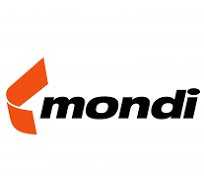
</center>

# Production data model

## Objectives

*   Load csv data
*   Understand the data
*   Clean data (handle empty data, outliers, low variance, etc.)
*   Exploratory data analysis
*   Visualization
*   Feature extrction
*   Train a ML model
*   Evaluate the model

## Step 1) Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from time import time
import os
import sys
import scipy
import seaborn as sns
import missingno as msno

In [2]:
df = pd.read_csv('production_data.csv')

## Step2) Understand the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22304 entries, 0 to 22303
Columns: 133 entries, Timestamp to Target
dtypes: float64(130), object(3)
memory usage: 22.6+ MB


In [4]:
# Shape of data
df.shape

(22304, 133)

In [5]:
df.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V9,V10,...,V122,V123,V124,V125,V126,V127,V128,V129,V130,Target
count,22008.000000,22020.000000,21996.000000,21992.00000,22010.000000,14944.000000,21989.000000,21979.000000,22008.000000,22008.000000,...,21990.000000,22021.000000,22007.000000,22009.000000,22005.000000,21978.000000,21999.000000,22007.000000,22016.000000,22304.000000
mean,9.965352,9.965392,11.137931,11.44891,6.893804,6.024266,5.215332,5.885940,8.473750,3.085196,...,6.401649,11.648318,6.898396,12.261380,5.655109,3.362499,12.799127,4.723848,10.882861,3.477834
std,59.962852,78.043899,87.755906,90.45542,81.900904,44.318798,40.879885,46.039284,92.827865,6.730325,...,38.529578,116.753535,273.822004,133.569738,34.068682,31.549224,120.341097,43.242215,26.867704,2.315068
min,8.000000,6.980000,8.000000,9.00000,4.000000,3.000000,4.000000,4.000000,6.000000,2.000000,...,5.000000,8.010000,3.000000,8.000000,4.000000,2.000000,9.000000,3.000000,9.000000,0.040000
25%,8.240000,7.740000,8.700000,9.14000,4.510000,4.670000,4.040000,4.630000,6.050000,2.000000,...,5.250000,8.380000,4.000000,8.630000,4.460000,2.530000,9.000000,3.530000,9.280000,3.410000
50%,8.250000,7.750000,8.710000,9.15000,4.510000,5.010000,4.040000,4.690000,6.050000,3.000000,...,5.270000,8.400000,4.000000,8.680000,4.490000,2.560000,10.000000,3.600000,9.320000,3.460000
75%,8.270000,7.760000,8.730000,9.16000,4.510000,5.350000,4.050000,4.740000,6.060000,3.000000,...,5.300000,8.430000,4.000000,8.740000,4.530000,2.590000,10.000000,3.660000,9.350000,3.510000
max,8249.300000,7757.560000,8703.800000,9157.10000,4513.680000,5230.420000,4043.630000,4657.490000,6059.580000,300.000000,...,5276.640000,8430.150000,40000.000000,8761.320000,4443.210000,2649.230000,10000.000000,3623.390000,934.370000,349.000000


In [6]:
#Check dataframe has any duplicates
len(df[df.duplicated()])

0

### Knowing about of missing data

<Axes: >

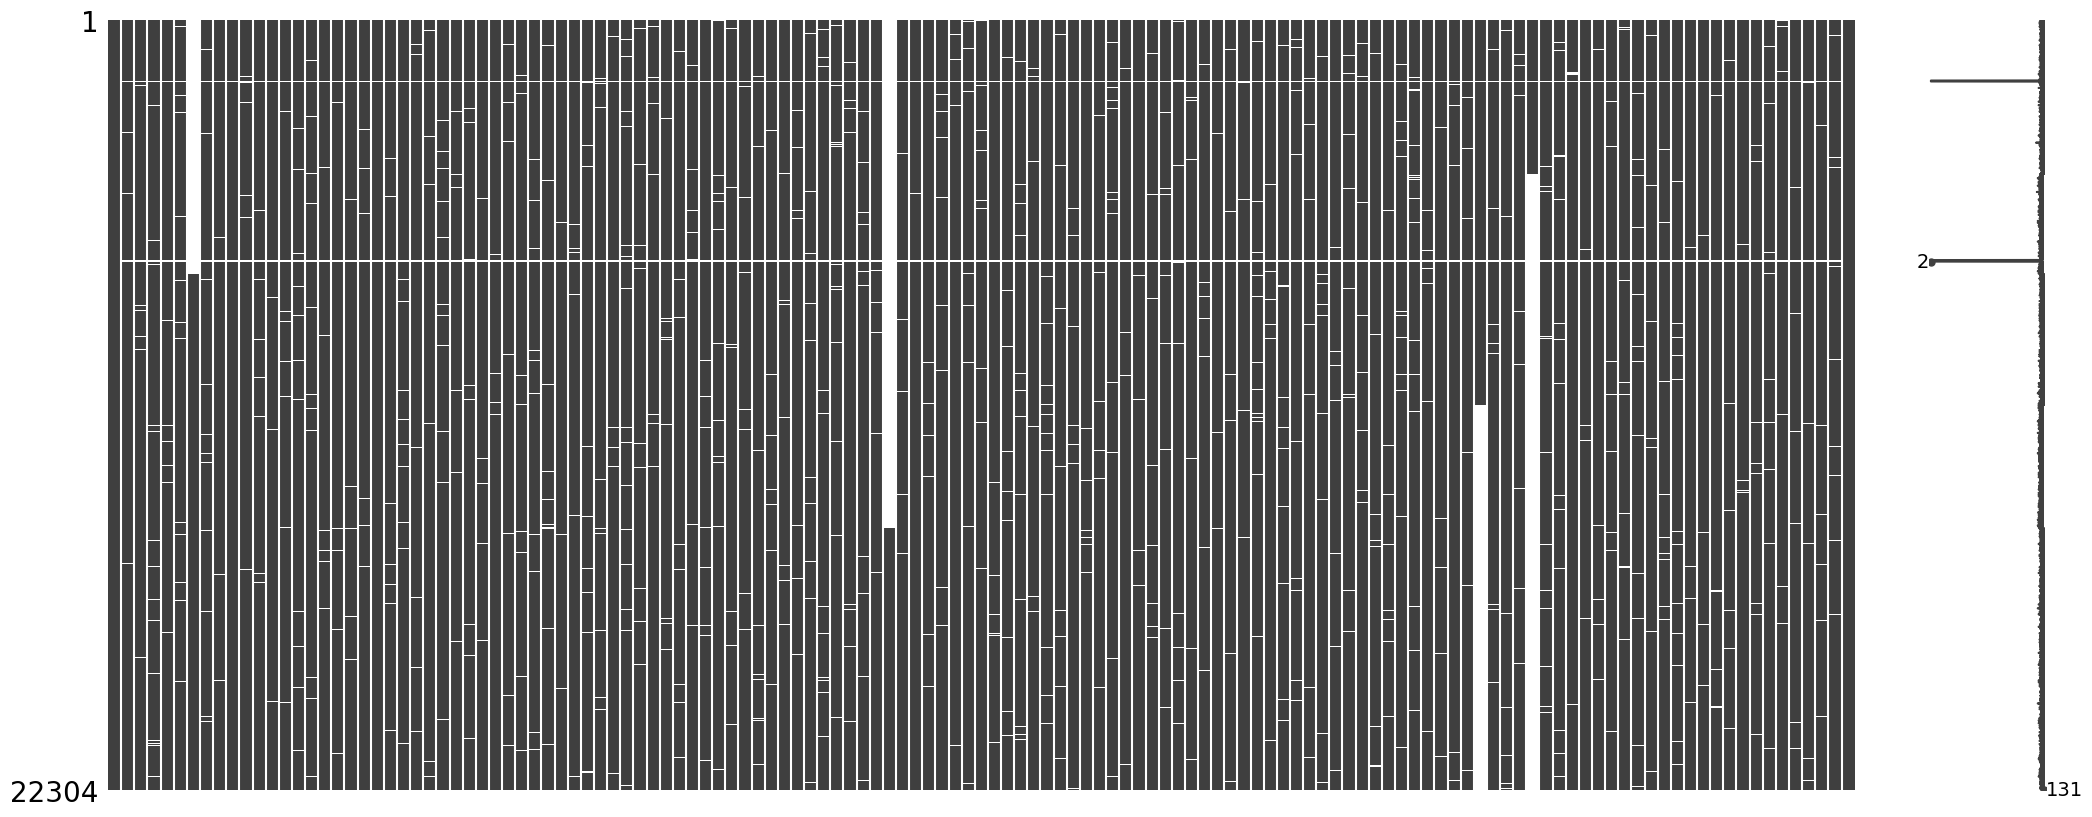

In [7]:
msno.matrix(df)

### unique values

Knowing about unique values of features can help us to understand the data and clean them in next steps.

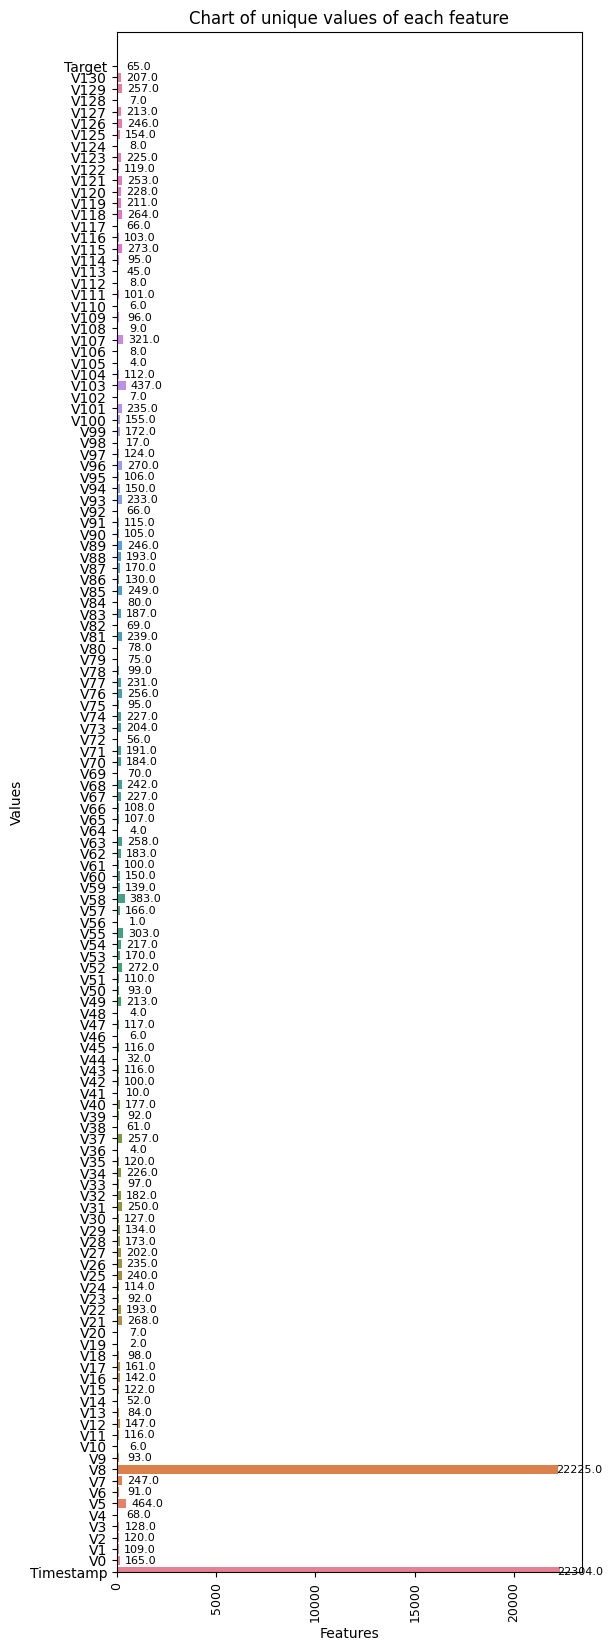

In [8]:
headers = df.columns
unique_values = {}

for column in headers:
    unique_values[column] = [df[column].nunique()]
uniq =  pd.DataFrame(unique_values)
unique_values
plt.figure(figsize=(6, 20))
ax =sns.barplot( data=uniq,orient='h')


plt.title('Chart of unique values of each feature')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=90,fontsize=9)
plt.ylim(0, 135)

for p in ax.patches:
    ax.annotate(f'{p.get_width():.1f}', (p.get_width(), p.get_y() + p.get_height() / 2.),
            ha='center', va='center', fontsize=8, color='black', xytext=(15, 0),
            textcoords='offset points')


plt.show()

## Step 3) Clean data

### Handle Categorical Data

In [9]:
df.describe(include=['object', 'category'])

,Timestamp,V8,V19
count,22304,22225,22225
unique,22304,22225,2
top,2021-01-02 12:59:50,J5J5JO,On
freq,1,1,11153


In [10]:
# drop for unique data
df.drop('V8', axis=1, inplace=True)


In [11]:
print(df['V19'].describe())


count     22225
unique        2
top          On
freq      11153
Name: V19, dtype: object


In [12]:
df['V19'] = df['V19'].map({'On': 1, 'Off': 0})
df['V19'].head()

0    0.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: V19, dtype: float64

### Handle missing values

In [13]:
# Calculate the percentage of missing values for each column
missing_values_percentage = (df.isnull().sum() / len(df)) * 100
# Sort the percentages in descending order
missing_values_percentage_sorted = missing_values_percentage.sort_values(ascending=False)

missing_values_percentage_sorted


V107         80.138092
V58          66.001614
V103         50.354197
V5           32.998565
V68           1.551291
               ...    
V11           1.210545
V87           1.192611
V19           0.354197
Timestamp     0.000000
Target        0.000000
Length: 132, dtype: float64

In [14]:
df.drop(columns=['V107', 'V58'], inplace=True)
df.head()

,Timestamp,V0,V1,V2,V3,V4,V5,V6,V7,V9,...,V122,V123,V124,V125,V126,V127,V128,V129,V130,Target
0,2021-01-02 12:59:50,8.25,7.75,8.73,9.14,4.53,NaN,4.05,4.55,NaN,...,5.27,8.41,4.0,87.0,4.52,2.56,10.0,3.51,9.26,3.40
1,2021-01-02 13:41:50,8.25,7.75,8.73,9.15,4.51,NaN,4.07,4.56,6.05,...,5.26,8.43,4.0,8.7,4.62,2.31,10.0,3.58,9.26,3.42
2,2021-01-02 16:07:50,8.25,7.76,8.73,9.16,4.51,NaN,4.05,4.60,6.04,...,5.27,8.42,4.0,8.7,4.47,2.31,9.0,3.59,9.26,3.44
3,2021-01-02 16:49:50,8.25,7.74,8.74,9.15,4.51,NaN,4.05,4.60,6.04,...,5.27,8.42,4.0,8.7,4.51,2.31,9.0,3.61,9.26,3.43
4,2021-01-02 19:11:50,8.25,7.75,8.74,9.18,4.51,NaN,4.05,4.61,6.04,...,5.27,8.43,4.0,8.7,4.72,2.31,9.0,3.62,9.26,3.46


Since we have time series data, **Interpolation** is a good choice.

but there is a point here:

for columns like V5 the missing values are at the beginning or the end of the column, the linear interpolation cannot estimate a value because it requires at least one non-missing value before and after the missing value to work, and we should handle this.

In [15]:
# Extract numerical columns
df_numerical = df.select_dtypes(include=['float64', 'int64'])
df[df_numerical.columns] = df_numerical.interpolate(method='linear')
df[df_numerical.columns] = df[df_numerical.columns].ffill().bfill()

In [16]:
# Let's take a look of missing values again
df.columns[df.isnull().any()]

Index([], dtype='object')

#### Handle Outliers

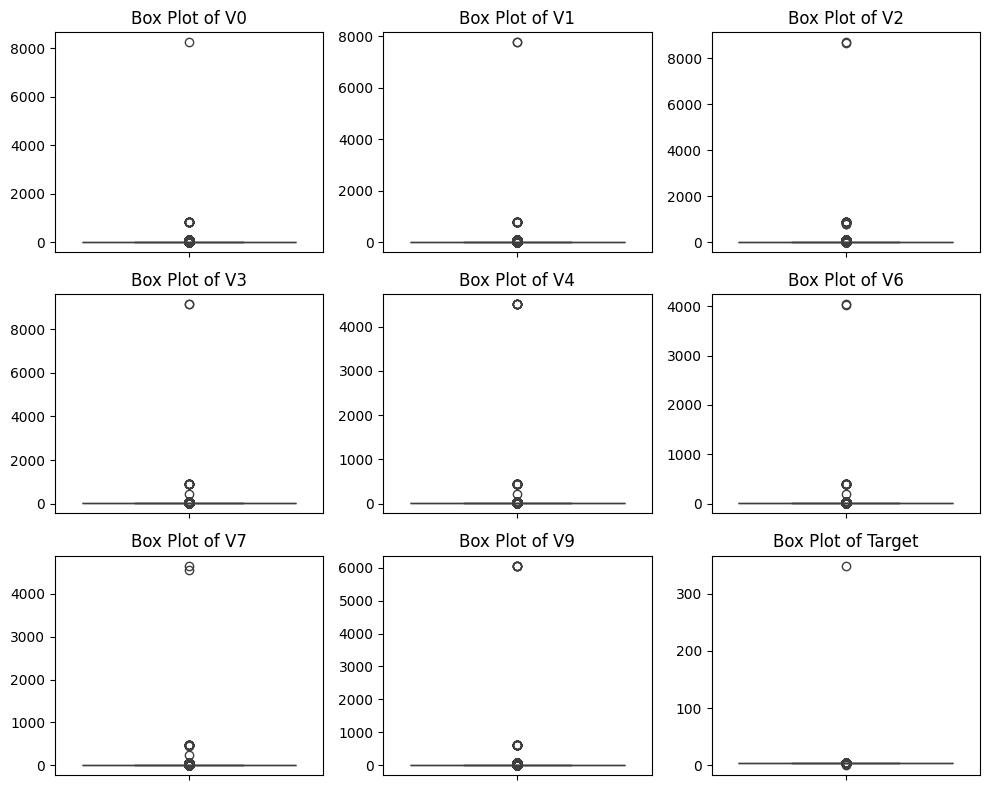

In [17]:
# (3x3 grid)
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
axes = axes.flatten()
columns_to_plot = ['V0', 'V1', 'V2', 'V3', 'V4', 'V6', 'V7', 'V9', 'Target']

for i, column in enumerate(columns_to_plot):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_ylabel('') 


plt.tight_layout()
plt.show()

In [18]:

def remove_outliers(df, column):
    threashold = df[column].mean() * 2
    threashold = 1.5
    Q1 = df[column].quantile(0.25)    
    Q3 = df[column].quantile(0.75)    
    IQR = Q3 - Q1    
    lower_bound = Q1 - threashold * IQR    
    upper_bound = Q3 + threashold * IQR    
    
    column_mean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)][column].median()
    df_cleaned = df[column].apply(lambda x: column_mean if x < lower_bound or x > upper_bound else x)
    
    return df_cleaned



# Exclude 'Timestamp' and 'Target' from the outlier detection process
features = df.loc[:, 'V0':'Target'] 
for feature in features:
    df[str(feature)] = remove_outliers(df,str(feature))
   

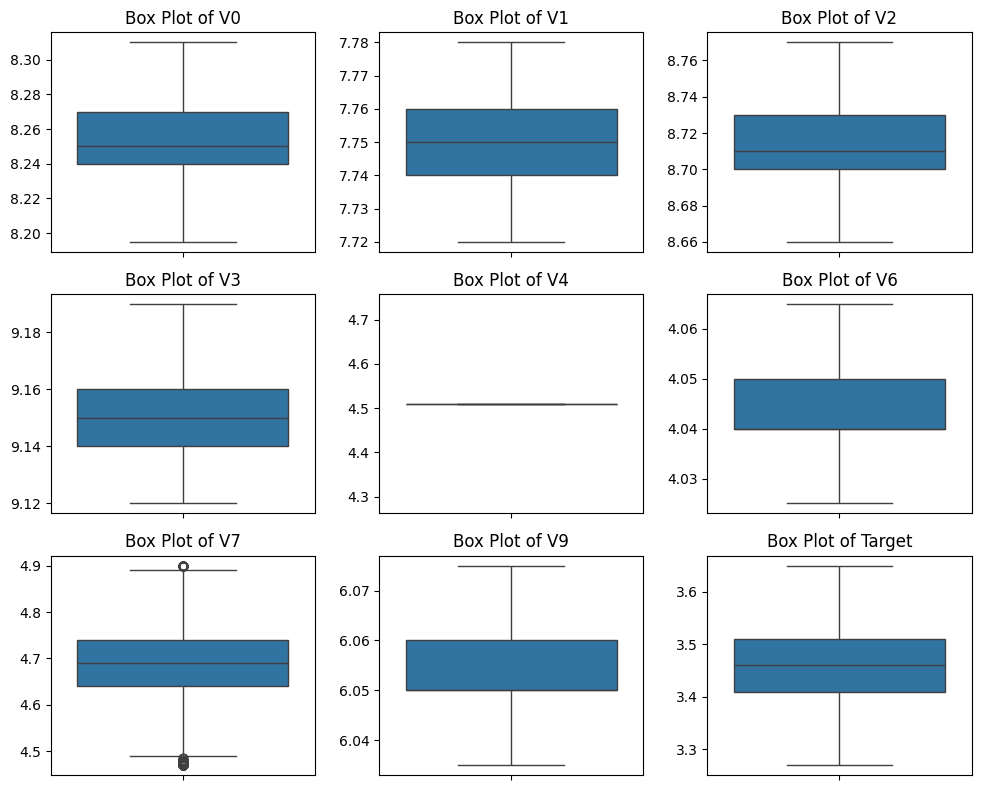

In [19]:
# (3x3 grid)
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
axes = axes.flatten()
columns_to_plot = ['V0', 'V1', 'V2', 'V3', 'V4', 'V6', 'V7', 'V9', 'Target']

for i, column in enumerate(columns_to_plot):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_ylabel('') 


plt.tight_layout()
plt.show()

#### Remove low variance feature

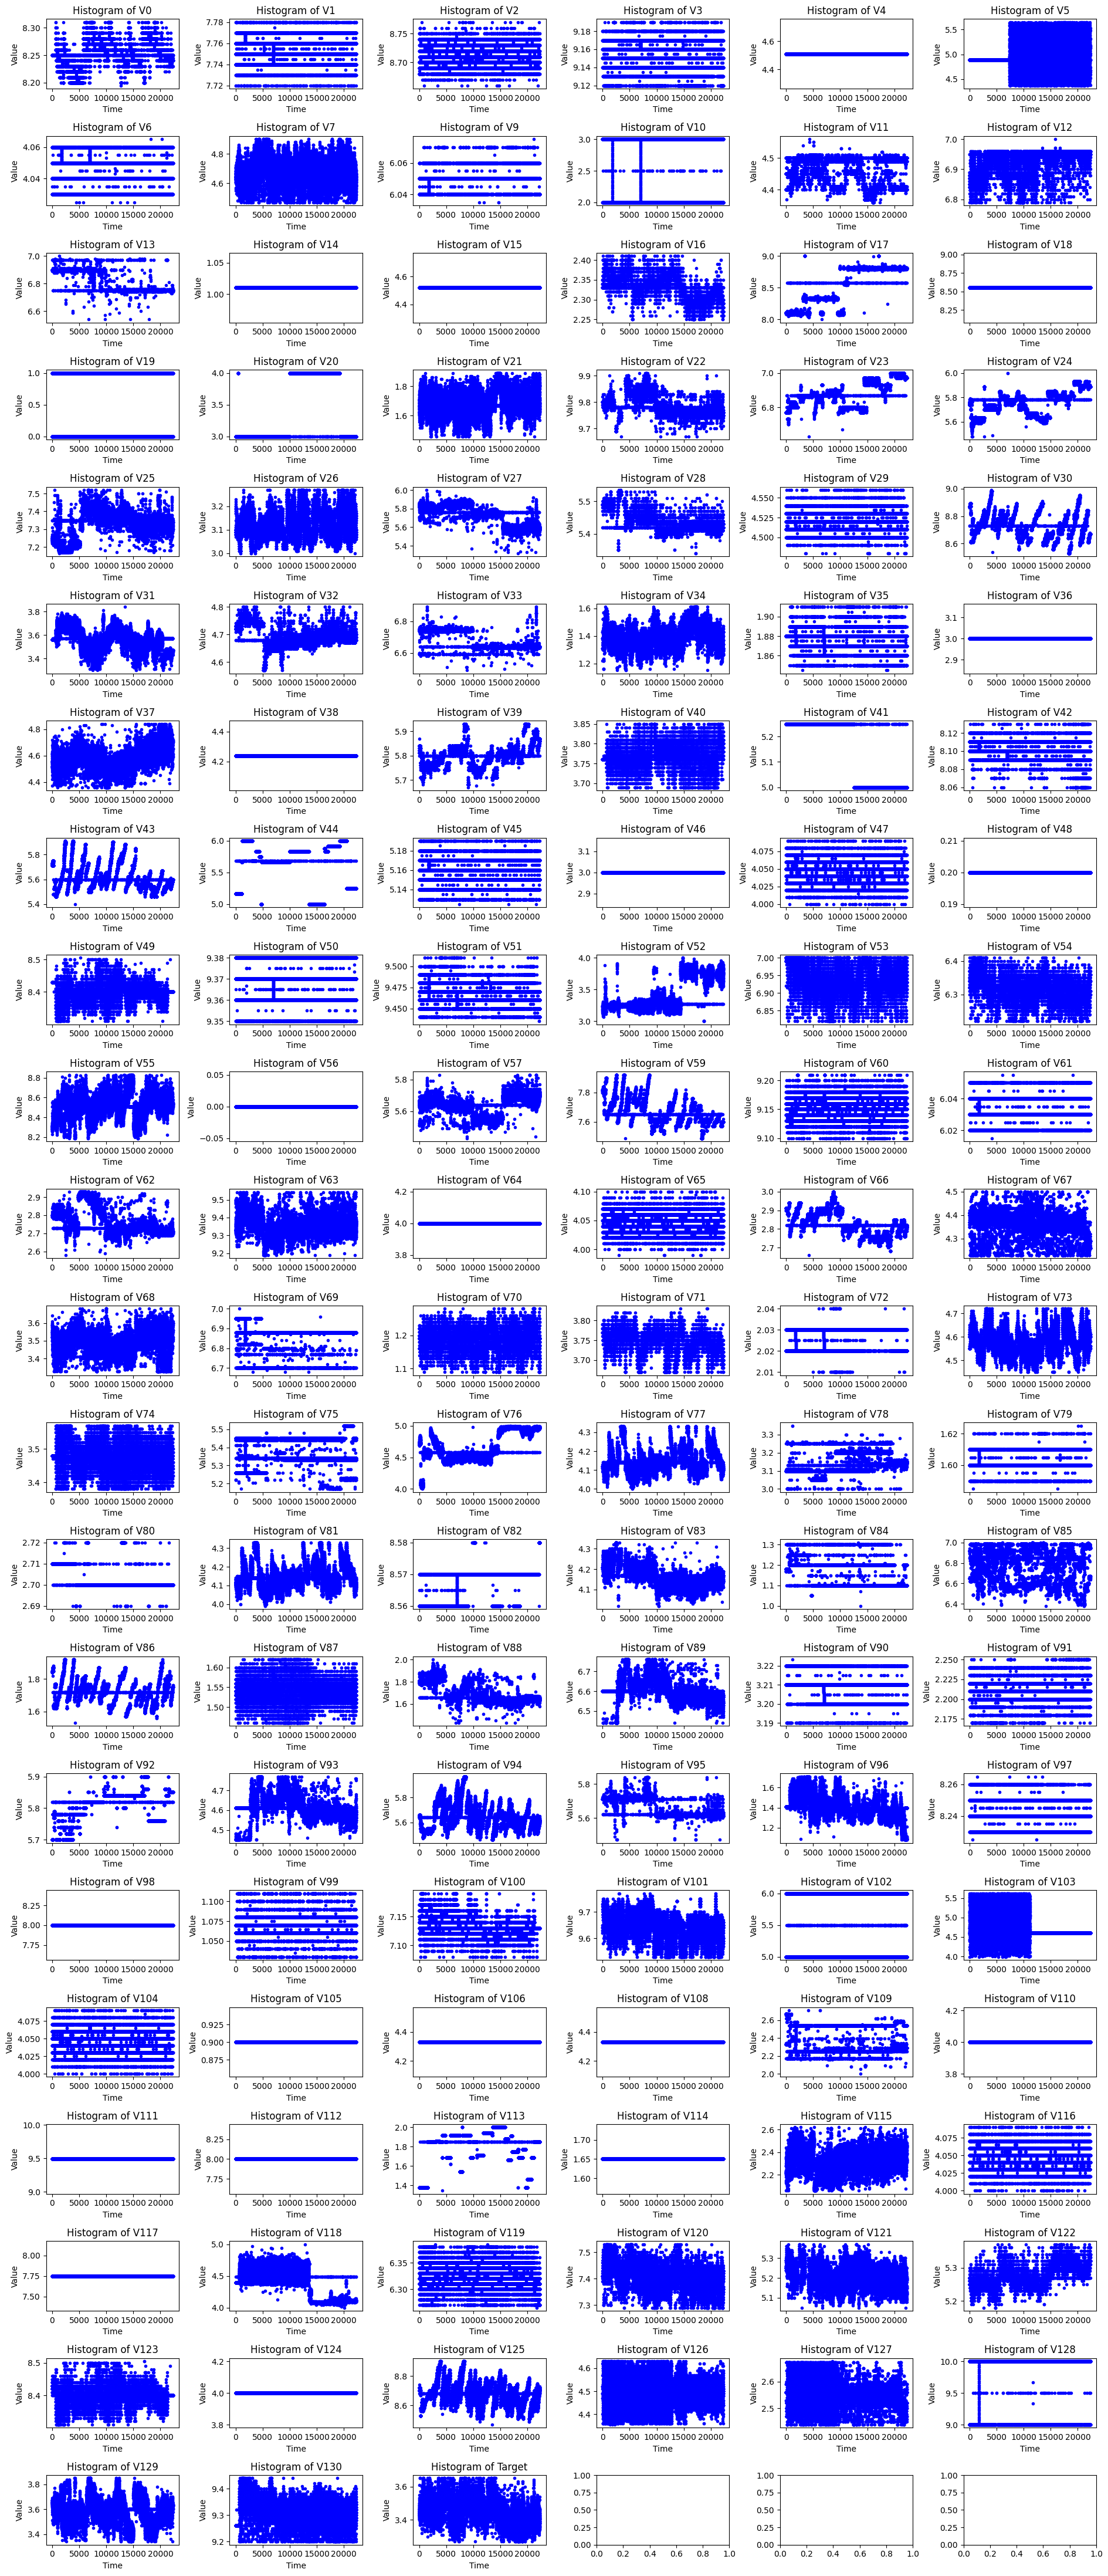

In [20]:

# Visualize each Sensor's data

numeric_columns = df.select_dtypes(include=['number']).columns
# numeric_columns = numeric_columns [:30]

num_plots = (len(numeric_columns) + 5) // 6
fig, axes = plt.subplots(nrows=num_plots, ncols=6, figsize=(19, num_plots*2))
axes = axes.flatten()
# Iterate through each numeric feature and create a plot
for i, col in enumerate(numeric_columns):
        df[col].plot(ax=axes[i], style='.', color='blue')
        axes[i].set_title('Histogram of ' + col)
        axes[i].set_xlabel('Time')
        axes[i].set_ylabel('Value')
        # axes[i].grid(False)

# Hide any unused subplots
for j in range(num_plots*6, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


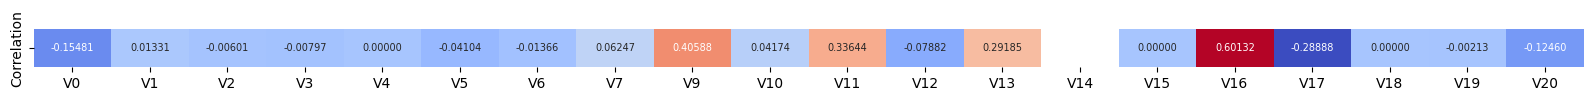

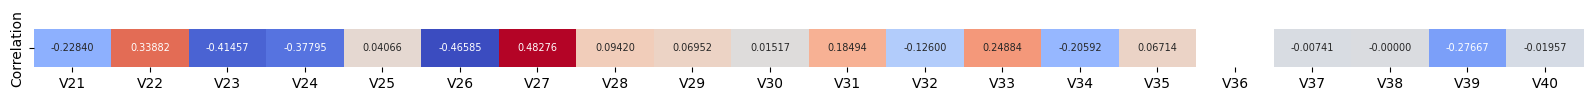

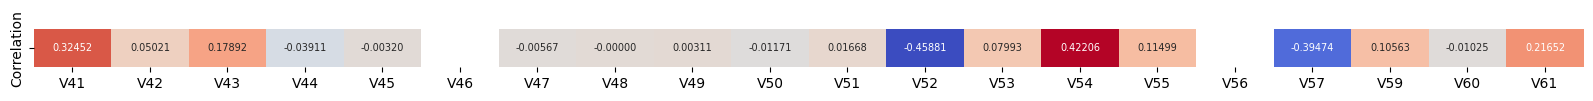

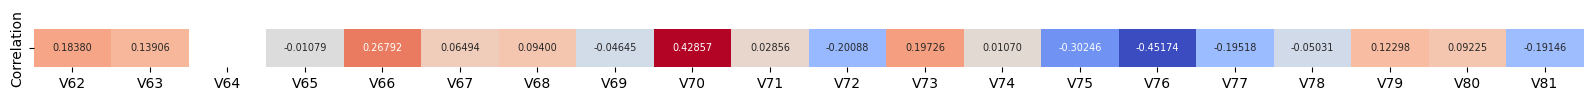

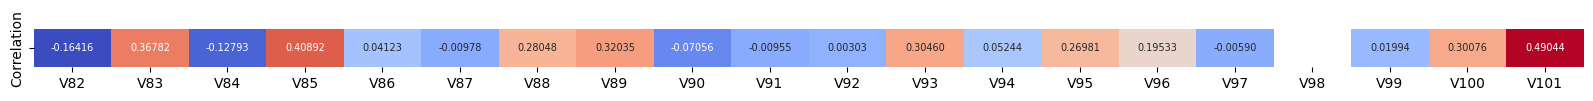

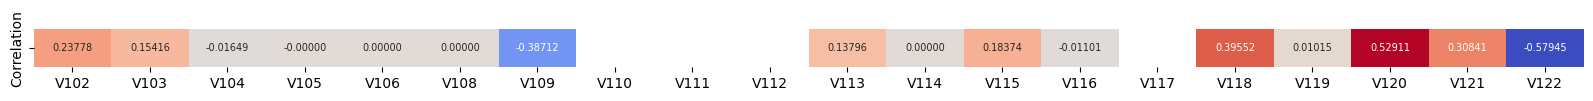

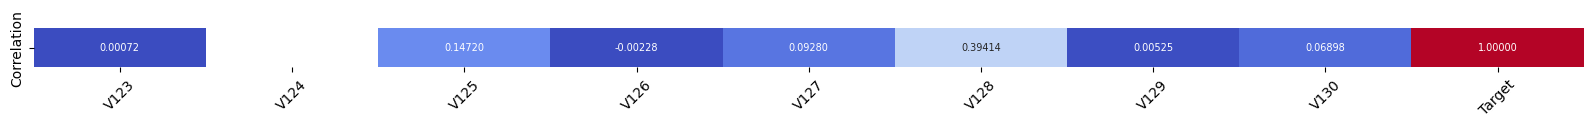

In [21]:
#Corrolation matrix
numeric_columns = df.select_dtypes(include=['number']).columns
corr = df[numeric_columns]
corr_with_feature = corr.corrwith(corr['Target'])
corr_df = pd.DataFrame(corr_with_feature, columns=['Correlation'])



for i in range(0,130,20):
    plt.figure(figsize=(20, 0.5))
    sns.heatmap(corr_df[i:i+20].T, annot=True, cmap='coolwarm', fmt=".5f", cbar=False,annot_kws={'fontsize': 7})
    
# plt.title(f'Correlation of  Target with other features')
# plt.xlabel('Features')
# plt.ylabel('')
plt.xticks(rotation=45)
plt.show()


In [22]:
from sklearn.feature_selection import VarianceThreshold

In [23]:
#Select only numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])
# Initialize the VarianceThreshold object
# The standard threshold for detecting low-variance columns doesn't have a one-size-fits-all value;
# it greatly depends on the context of our data and the specific requirements of your analysis or modeling task.
selector = VarianceThreshold(threshold=0.00002)  
selector.fit(numerical_df)
variances = selector.variances_
# Boolean mask of features to keep (True means the variance is above the threshold)
features_mask = selector.get_support()
# Columns with low variance (to potentially drop)
low_variance_columns = numerical_df.columns[~features_mask]
print(low_variance_columns)

Index(['V4', 'V14', 'V15', 'V18', 'V36', 'V38', 'V46', 'V48', 'V56', 'V64',
       'V98', 'V105', 'V106', 'V108', 'V110', 'V111', 'V112', 'V114', 'V117',
       'V124'],
      dtype='object')


In [24]:
# Let's check range of data for features that detected as low variance
for ftr in low_variance_columns:
    print(f'{ftr} Min:{df[ftr].min()} --- Max:{df[ftr].max()}' )
    

V4 Min:4.51 --- Max:4.51
V14 Min:1.01 --- Max:1.01
V15 Min:4.52 --- Max:4.52
V18 Min:8.55 --- Max:8.55
V36 Min:3.0 --- Max:3.0
V38 Min:4.24 --- Max:4.24
V46 Min:3.0 --- Max:3.0
V48 Min:0.2 --- Max:0.2
V56 Min:0.0 --- Max:0.0
V64 Min:4.0 --- Max:4.0
V98 Min:8.0 --- Max:8.0
V105 Min:0.9 --- Max:0.9
V106 Min:4.33 --- Max:4.33
V108 Min:4.33 --- Max:4.33
V110 Min:4.0 --- Max:4.0
V111 Min:9.49 --- Max:9.49
V112 Min:8.0 --- Max:8.0
V114 Min:1.65 --- Max:1.65
V117 Min:7.75 --- Max:7.75
V124 Min:4.0 --- Max:4.0


In [25]:
df = df.drop(columns=low_variance_columns)

## Step 4) Visualization

In [26]:
df.describe()

,V0,V1,V2,V3,V5,V6,V7,V9,V10,V11,...,V121,V122,V123,V125,V126,V127,V128,V129,V130,Target
count,22304.000000,22304.000000,22304.000000,22304.000000,22304.000000,22304.000000,22304.000000,22304.000000,22304.000000,22304.000000,...,22304.000000,22304.000000,22304.000000,22304.000000,22304.000000,22304.000000,22304.000000,22304.000000,22304.000000,22304.000000
mean,8.251993,7.751486,8.711735,9.152442,4.950029,4.043861,4.687386,6.051906,2.702632,4.469184,...,5.207562,5.274098,8.398283,8.681679,4.493920,2.555525,9.743275,3.593788,9.317065,3.461213
std,0.022264,0.010901,0.018655,0.015179,0.249377,0.009376,0.081607,0.007823,0.455735,0.040822,...,0.051424,0.032028,0.027477,0.071845,0.049149,0.044651,0.435653,0.093042,0.042576,0.072805
min,8.195000,7.720000,8.660000,9.120000,4.370000,4.025000,4.470000,6.035000,2.000000,4.360000,...,5.050000,5.180000,8.310000,8.470000,4.355000,2.440000,9.000000,3.340000,9.200000,3.270000
25%,8.240000,7.740000,8.700000,9.140000,4.890000,4.040000,4.640000,6.050000,2.000000,4.449609,...,5.170000,5.250000,8.380000,8.630000,4.470000,2.530000,9.000000,3.530000,9.290000,3.410000
50%,8.250000,7.750000,8.710000,9.150000,4.890000,4.040000,4.690000,6.050000,3.000000,4.500000,...,5.210000,5.270000,8.400000,8.680000,4.490000,2.560000,10.000000,3.600000,9.320000,3.460000
75%,8.270000,7.760000,8.730000,9.160000,5.030000,4.050000,4.740000,6.060000,3.000000,4.500000,...,5.240000,5.290000,8.410000,8.720000,4.520000,2.580000,10.000000,3.650000,9.340000,3.510000
max,8.310000,7.780000,8.770000,9.190000,5.650000,4.065000,4.900000,6.075000,3.000000,4.560000,...,5.370000,5.370000,8.505000,8.900000,4.630000,2.675000,10.000000,3.850000,9.440000,3.650000


Visualizing the distribution of individual features can help in understanding the spread of data, and identifying skewness.

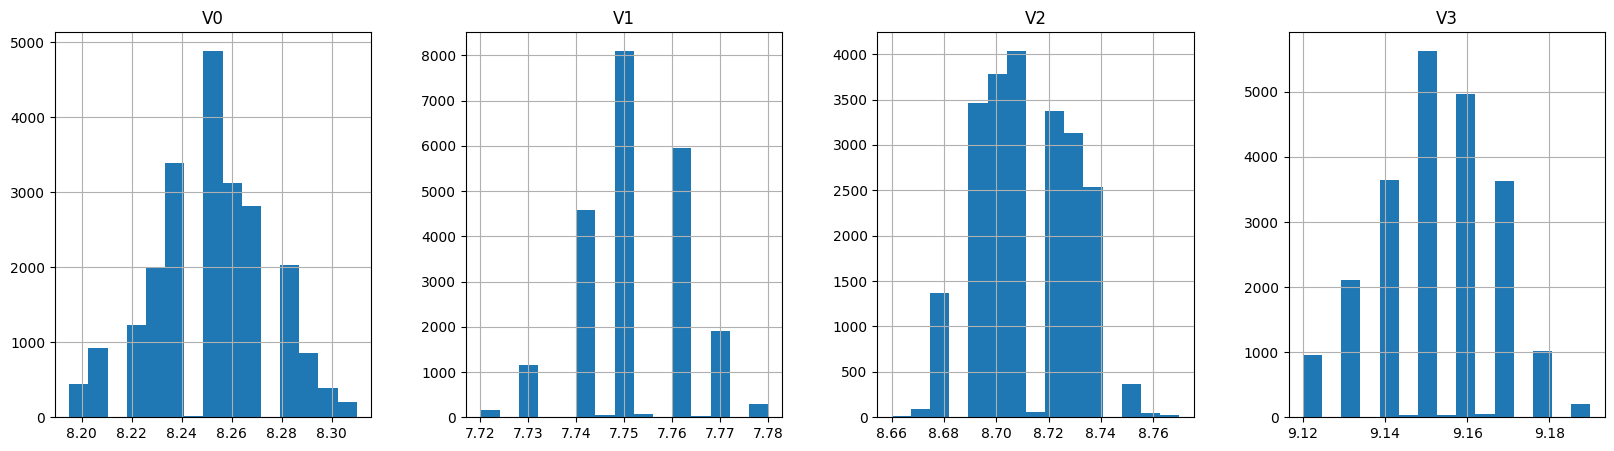

In [27]:
features_to_plot = ['V0', 'V1', 'V2', 'V3']
df[features_to_plot].hist(bins=15, figsize=(20, 5), layout=(1, 4))
plt.show()

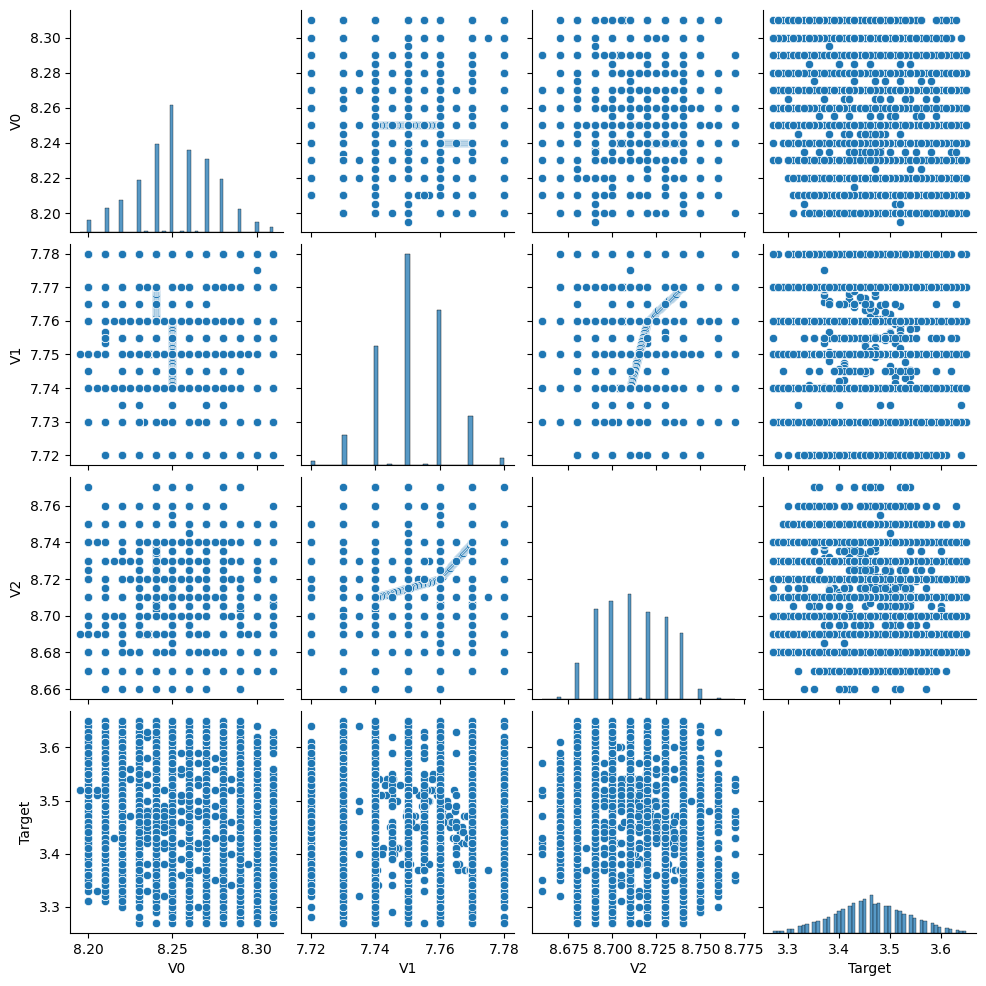

In [28]:
# Pairplot for a subset of features including the target
sns.pairplot(df[['V0', 'V1', 'V2', 'Target']])
plt.show()

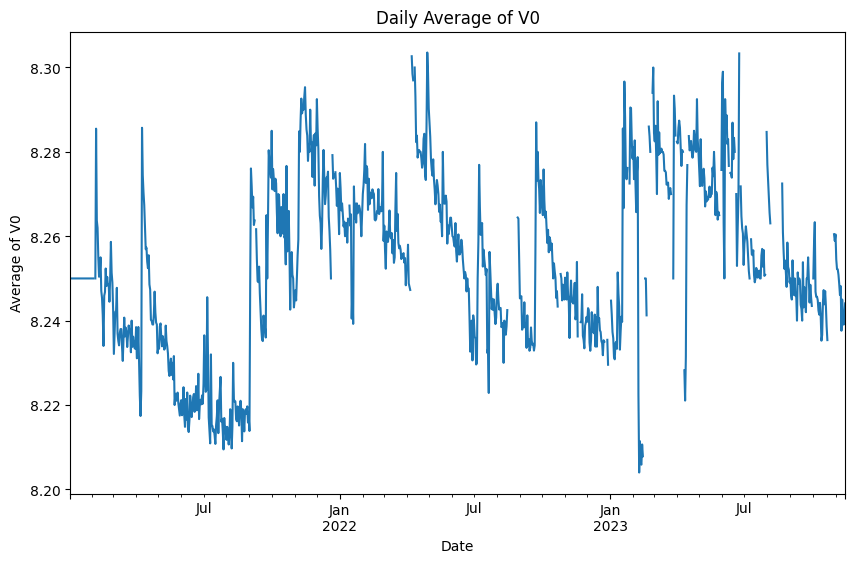

In [29]:
# Set Timestamp as index
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_time = df.set_index('Timestamp')

# Resample and plot average daily values of a feature
df_time['V0'].resample('D').mean().plot(title='Daily Average of V0', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Average of V0')
plt.show()

#### Time sereis chart

Plotting the target variable over time can reveal trends, seasonality, or cyclic behavior.

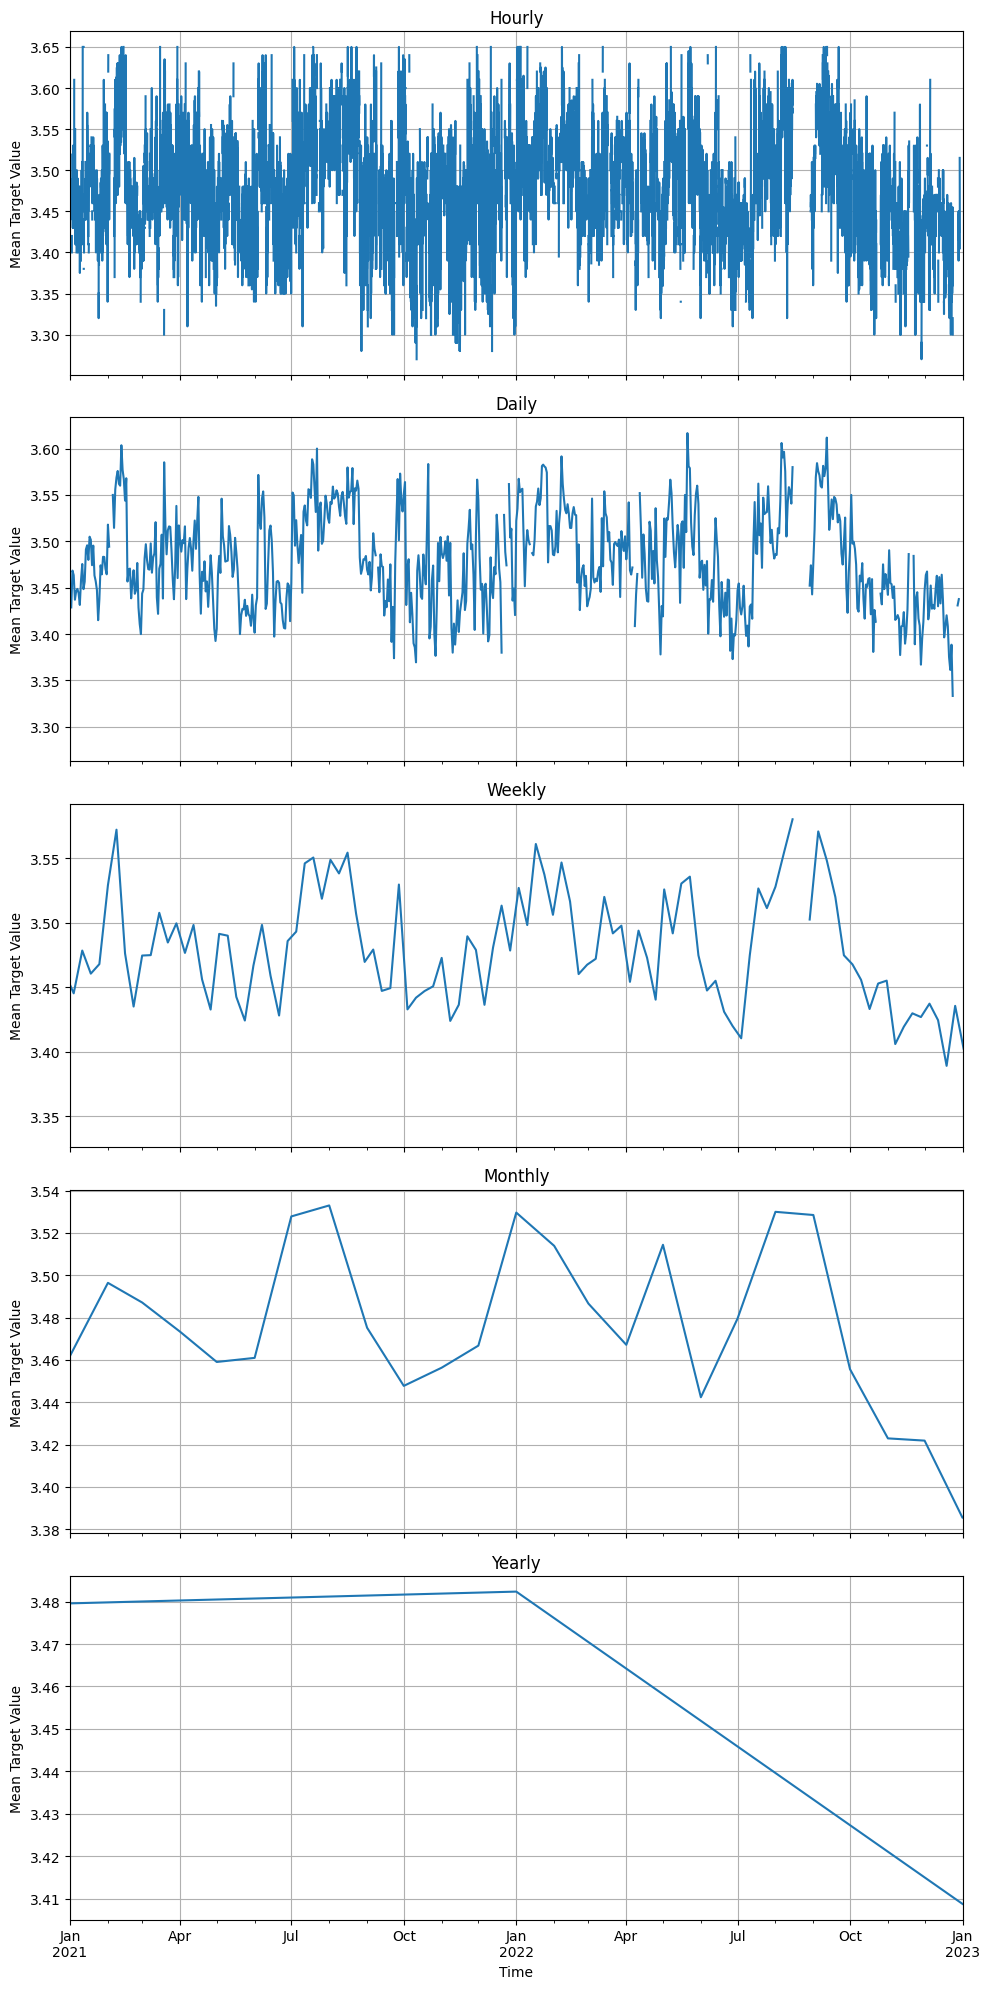

In [30]:
tdf = df.set_index('Timestamp')

# Resample the data to group by different time frequencies (hourly, daily, weekly, monthly, yearly)
# Here, we are resampling for Hourly ('H'), Daily ('D'), Weekly ('W'), Monthly ('M'), and Yearly ('Y') frequencies
hourly_data = tdf['Target'].resample('h').mean()
daily_data = tdf['Target'].resample('D').mean()
weekly_data = tdf['Target'].resample('W').mean()
monthly_data = tdf['Target'].resample('ME').mean()
yearly_data = tdf['Target'].resample('YE').mean()

# Plot the data for different time frequencies
fig, axs = plt.subplots(5, 1, figsize=(10, 20), sharex=True)

hourly_data.plot(ax=axs[0])
axs[0].set_title('Hourly')
axs[0].set_ylabel('Mean Target Value')
axs[0].grid(True)

daily_data.plot(ax=axs[1])
axs[1].set_title('Daily')
axs[1].set_ylabel('Mean Target Value')
axs[1].grid(True)

weekly_data.plot(ax=axs[2])
axs[2].set_title('Weekly')
axs[2].set_ylabel('Mean Target Value')
axs[2].grid(True)

monthly_data.plot(ax=axs[3])
axs[3].set_title('Monthly')
axs[3].set_ylabel('Mean Target Value')
axs[3].grid(True)

yearly_data.plot(ax=axs[4])
axs[4].set_title('Yearly')
axs[4].set_ylabel('Mean Target Value')
axs[4].grid(True)

plt.xlabel('Time')
plt.tight_layout()
plt.show()

#### Analyzing data at different time and trends in the dataset.

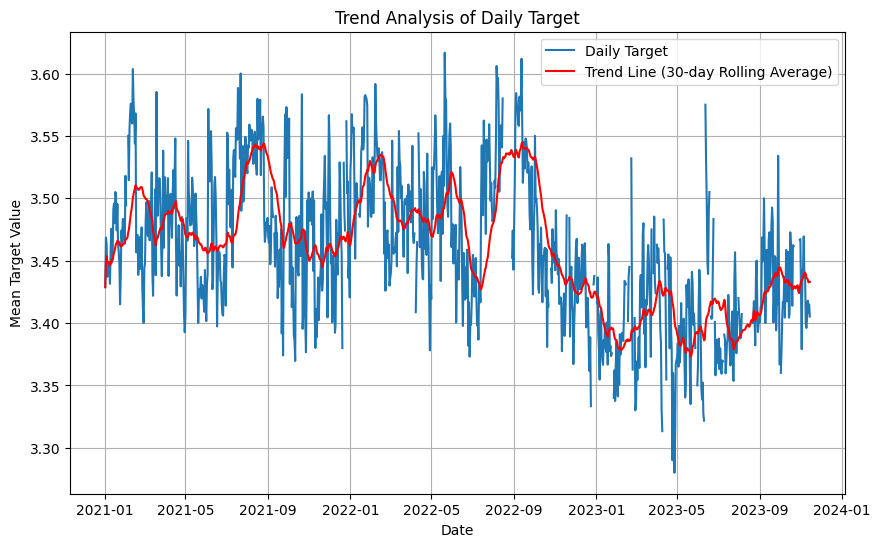

In [31]:
tdf = df.set_index('Timestamp')

# Resample the data to group by different time frequencies (hourly, daily, weekly, monthly, yearly)
# Here, we are resampling for Daily ('D') frequency
daily_data = tdf['Target'].resample('D').mean()

# Fit a trend line to the data
trend = daily_data.rolling(window=30, min_periods=1).mean()  # Using a 30-day rolling average as a simple trend line

# Plot the data and the trend line
plt.figure(figsize=(10, 6))
plt.plot(daily_data.index, daily_data, label='Daily Target')
plt.plot(trend.index, trend, color='red', label='Trend Line (30-day Rolling Average)')
plt.title('Trend Analysis of Daily Target')
plt.xlabel('Date')
plt.ylabel('Mean Target Value')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
! pip install statsmodels

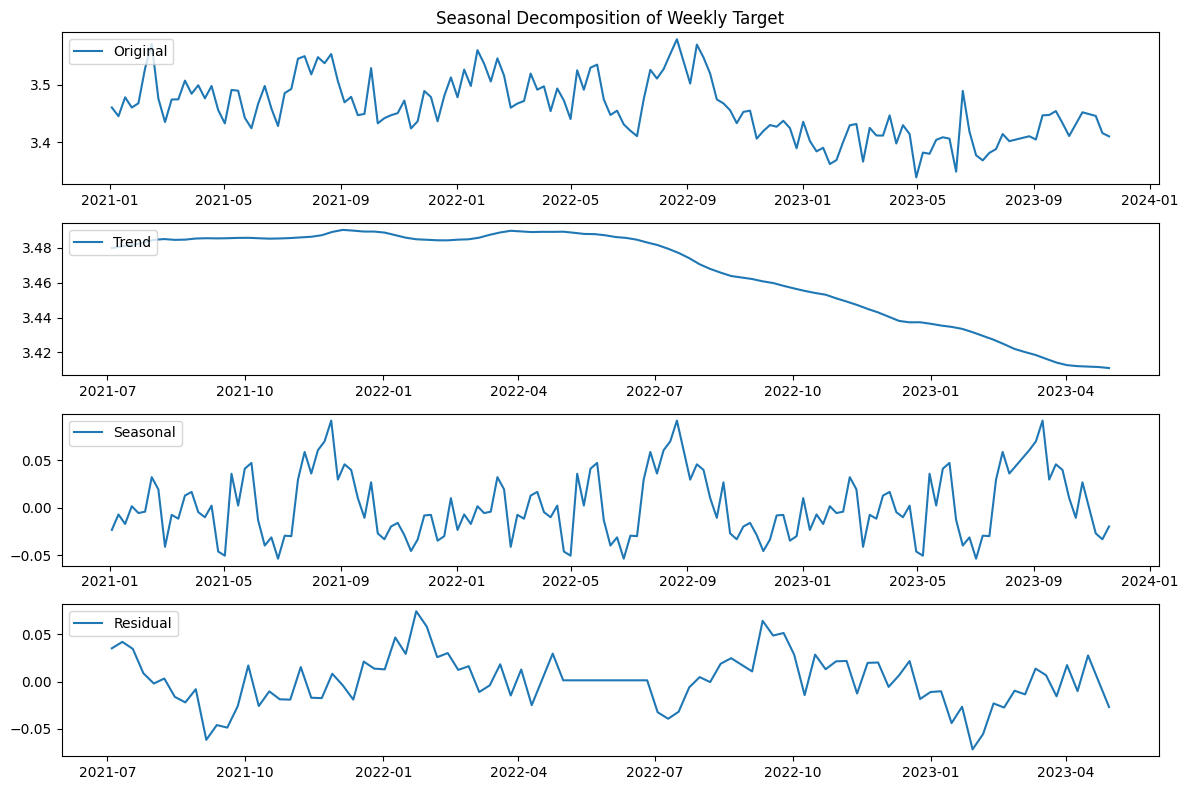

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
tdf = df.set_index('Timestamp')

weekly_data = tdf['Target'].resample('W').mean()
weekly_data.dropna(inplace=True)
# Perform seasonal decomposition
result = seasonal_decompose(weekly_data, model='additive', period=52)  # Assuming a yearly seasonality with a period of 52 weeks

# Plot the original data, trend, seasonal, and residual components
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(weekly_data, label='Original')
plt.legend(loc='upper left')
plt.title('Seasonal Decomposition of Weekly Target')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

## Feature selection

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = df.drop(['Timestamp', 'Target'], axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### linear Regression

Feature: V0, Score: -0.19988
Feature: V1, Score: 0.00739
Feature: V2, Score: -0.00190
Feature: V3, Score: 0.02178
Feature: V4, Score: 0.00032
Feature: V5, Score: -0.10410
Feature: V6, Score: 0.01253
Feature: V7, Score: 1.14265
Feature: V9, Score: -0.00130
Feature: V10, Score: -0.09027
Feature: V11, Score: 0.03141
Feature: V12, Score: 0.00341
Feature: V13, Score: 0.38318
Feature: V14, Score: -0.02303
Feature: V15, Score: -0.00136
Feature: V16, Score: -0.00369
Feature: V17, Score: 0.03736
Feature: V18, Score: 0.14540
Feature: V19, Score: -0.02965
Feature: V20, Score: 0.05220
Feature: V21, Score: -0.04881
Feature: V22, Score: -0.19172
Feature: V23, Score: 0.03954
Feature: V24, Score: -0.09043
Feature: V25, Score: 0.06531
Feature: V26, Score: -0.04866
Feature: V27, Score: -0.00802
Feature: V28, Score: -0.03706
Feature: V29, Score: 0.04199
Feature: V30, Score: -0.00533
Feature: V31, Score: -0.02207
Feature: V32, Score: -0.04325
Feature: V33, Score: 0.04513
Feature: V34, Score: 0.02105
Featu

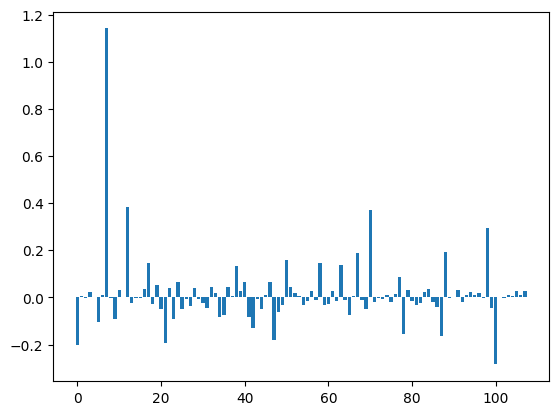

In [36]:

from sklearn.linear_model import LinearRegression

# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in zip(numeric_columns,importance):
     print(f'Feature: {i}, Score: %.5f' % (v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#### decisionTreeRegressor

Feature: V0, Score: 0.00355
Feature: V1, Score: 0.00236
Feature: V2, Score: 0.00237
Feature: V3, Score: 0.00183
Feature: V4, Score: 0.00272
Feature: V5, Score: 0.00081
Feature: V6, Score: 0.00675
Feature: V7, Score: 0.03331
Feature: V9, Score: 0.00102
Feature: V10, Score: 0.00438
Feature: V11, Score: 0.00159
Feature: V12, Score: 0.00095
Feature: V13, Score: 0.28273
Feature: V14, Score: 0.00190
Feature: V15, Score: 0.00105
Feature: V16, Score: 0.00004
Feature: V17, Score: 0.00619
Feature: V18, Score: 0.01163
Feature: V19, Score: 0.01758
Feature: V20, Score: 0.00290
Feature: V21, Score: 0.00399
Feature: V22, Score: 0.02181
Feature: V23, Score: 0.00797
Feature: V24, Score: 0.00107
Feature: V25, Score: 0.00239
Feature: V26, Score: 0.00798
Feature: V27, Score: 0.00533
Feature: V28, Score: 0.01115
Feature: V29, Score: 0.00057
Feature: V30, Score: 0.00466
Feature: V31, Score: 0.00155
Feature: V32, Score: 0.00363
Feature: V33, Score: 0.00543
Feature: V34, Score: 0.00312
Feature: V35, Score: 0.

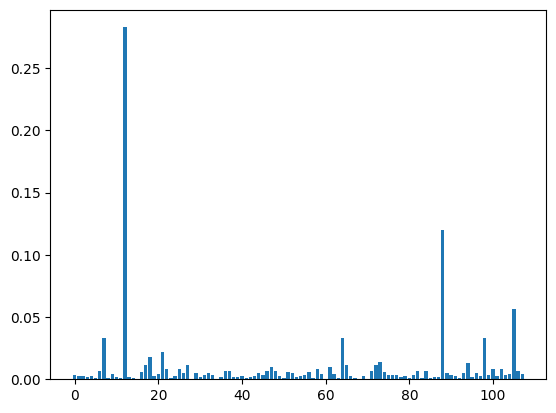

In [37]:

from sklearn.tree import DecisionTreeRegressor

model = model = DecisionTreeRegressor()
model.fit(X, y)
importance = model.feature_importances_
for i,v in zip(numeric_columns,importance):
     print(f'Feature: {i}, Score: %.5f' % (v))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()




#### RandomForestRegressor

Feature: V0, Score: 0.00469
Feature: V1, Score: 0.00179
Feature: V2, Score: 0.00256
Feature: V3, Score: 0.00187
Feature: V4, Score: 0.00318
Feature: V5, Score: 0.00112
Feature: V6, Score: 0.00581
Feature: V7, Score: 0.03210
Feature: V9, Score: 0.00068
Feature: V10, Score: 0.00295
Feature: V11, Score: 0.00265
Feature: V12, Score: 0.00192
Feature: V13, Score: 0.28279
Feature: V14, Score: 0.00521
Feature: V15, Score: 0.00053
Feature: V16, Score: 0.00027
Feature: V17, Score: 0.00562
Feature: V18, Score: 0.00984
Feature: V19, Score: 0.01283
Feature: V20, Score: 0.00297
Feature: V21, Score: 0.00557
Feature: V22, Score: 0.02608
Feature: V23, Score: 0.00873
Feature: V24, Score: 0.00166
Feature: V25, Score: 0.00196
Feature: V26, Score: 0.00793
Feature: V27, Score: 0.00620
Feature: V28, Score: 0.00949
Feature: V29, Score: 0.00176
Feature: V30, Score: 0.00500
Feature: V31, Score: 0.00178
Feature: V32, Score: 0.00491
Feature: V33, Score: 0.00376
Feature: V34, Score: 0.00344
Feature: V35, Score: 0.

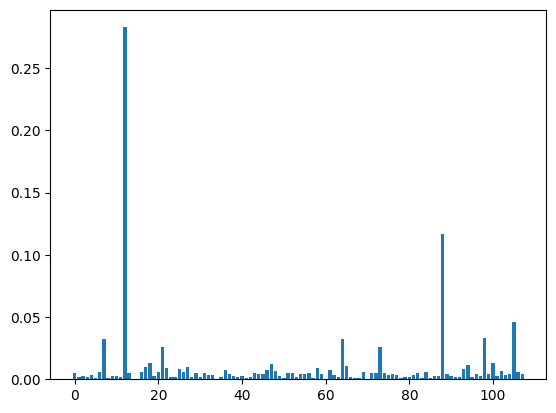

In [38]:
from sklearn.ensemble import RandomForestRegressor

model = model = RandomForestRegressor()
model.fit(X, y)
importance = model.feature_importances_
for i,v in zip(numeric_columns,importance):
     print(f'Feature: {i}, Score: %.5f' % (v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


#### SelectKBest

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Select the top k features based on F-test
k = 8  # Number of features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)
selected_features_indices = selector.get_support(indices=True)

In [40]:
selected_features = X.columns[selected_features_indices]

In [41]:
selected_features

Index(['V16', 'V26', 'V27', 'V52', 'V85', 'V101', 'V120', 'V122'], dtype='object')

In [42]:
# Reduce training and testing sets to selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
print(f"Train shape: {X_train_selected.shape}")
print(f"Test shape: {X_test_selected.shape}")

Train shape: (17843, 8)
Test shape: (4461, 8)


## Step 6) Train & Evaluation Model

### normalize values

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_selected), columns=X_train_selected.columns, index=X_train_selected.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_selected), columns=X_test_selected.columns, index=X_test_selected.index)

#### Simple linear regression

In [45]:
from sklearn.linear_model import LinearRegression

##### train model

In [46]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_pred

array([3.46952352, 3.36578738, 3.48014373, ..., 3.44256573, 3.41209248,
       3.39590897])

##### evalute model 

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

In [48]:
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [49]:
metrics_df = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R^2'],
    'Value': [mse, rmse, mae, r2]
})
metrics_df

,Metric,Value
0,MSE,0.002346
1,RMSE,0.048435
2,MAE,0.037186
3,R^2,0.563701


#### visualize result

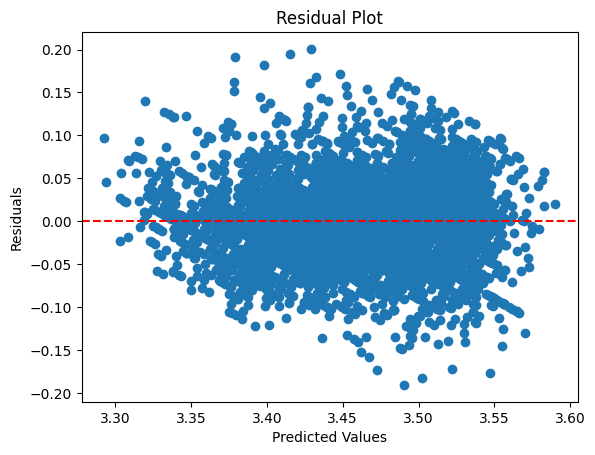

In [50]:
plt.scatter(y_pred, y_test - y_pred)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

### Polynomial Regression

In [51]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#### train model

In [52]:
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train)
y_pred_poly = model.predict(X_test)

#### evaluate model

In [53]:
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = sqrt(mse_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
metrics_df_poly = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R^2'],
    'Value': [mse_poly, rmse_poly, mae_poly, r2_poly]
})
metrics_df_poly

,Metric,Value
0,MSE,0.002084
1,RMSE,0.045648
2,MAE,0.033659
3,R^2,0.612463


#### visulaize 

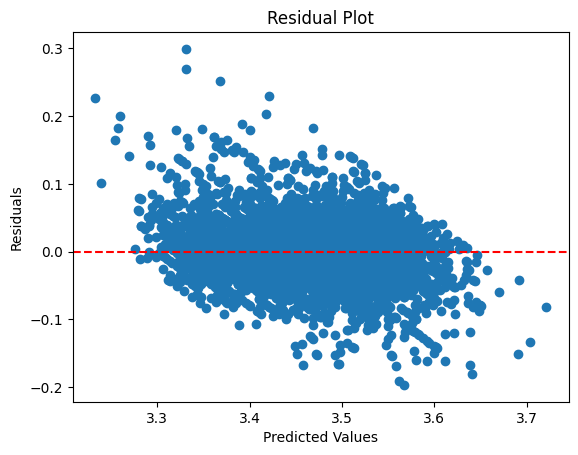

In [54]:
plt.scatter(y_pred_poly, y_test - y_pred_poly)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

### Random Forest

In [55]:
from sklearn.ensemble import RandomForestRegressor

#### train model

In [56]:
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

#### evaluate model

In [57]:
y_pred_rf = random_forest_model.predict(X_test_scaled)

In [58]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
metrics_df_rf = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R^2'],
    'Value': [mse_rf, rmse_rf, mae_rf, r2_rf]
})
metrics_df_rf

,Metric,Value
0,MSE,0.001602
1,RMSE,0.040025
2,MAE,0.029113
3,R^2,0.702063


#### visulaize 

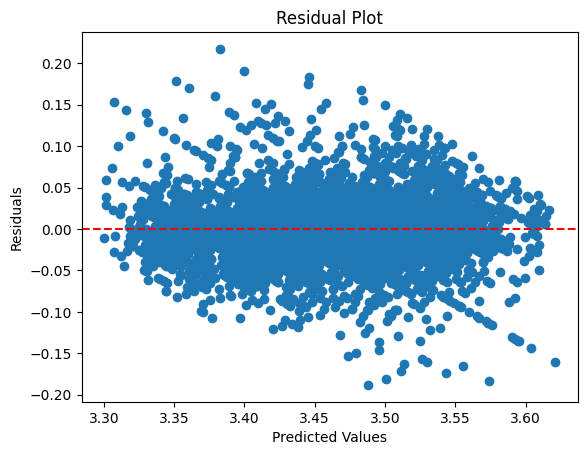

In [59]:
plt.scatter(y_pred_rf, y_test - y_pred_rf)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

### Gradient Boosting Machine (GBM)

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

#### train model

In [61]:
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(random_state=42)

#### evaluate model

In [62]:
y_pred_gbm = gbm_model.predict(X_test_scaled)
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
rmse_gbm = sqrt(mse_gbm)
mae_gbm = mean_absolute_error(y_test, y_pred_gbm)
r2_gbm = r2_score(y_test, y_pred_gbm)
metrics_df_gmb = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R^2'],
    'Value': [mse_gbm, rmse_gbm, mae_gbm, r2_gbm]
})
metrics_df_gmb

,Metric,Value
0,MSE,0.001902
1,RMSE,0.043617
2,MAE,0.033085
3,R^2,0.646182


#### visulaize 

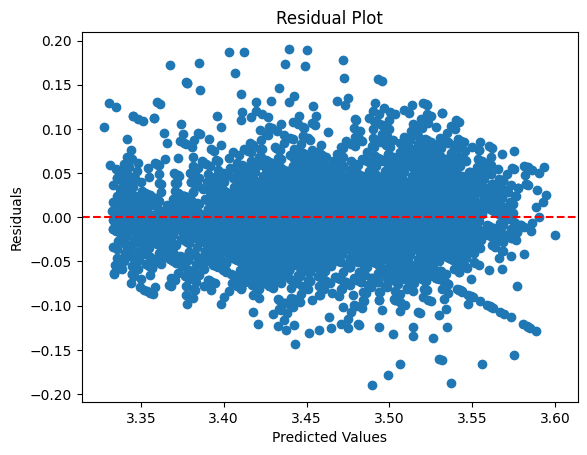

In [63]:
plt.scatter(y_pred_gbm, y_test - y_pred_gbm)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

### Support Vector Regression

In [64]:
from sklearn.svm import SVR

#### train model

In [65]:
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)

SVR()

#### evaluate model

In [67]:
y_pred_svr = svr_model.predict(X_test_scaled)

In [68]:
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = sqrt(mse_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
metrics_df_svr = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R^2'],
    'Value': [mse_svr, rmse_svr, mae_svr, r2_svr]
})
metrics_df_svr

,Metric,Value
0,MSE,0.002313
1,RMSE,0.048096
2,MAE,0.037894
3,R^2,0.569790


#### visulaize 

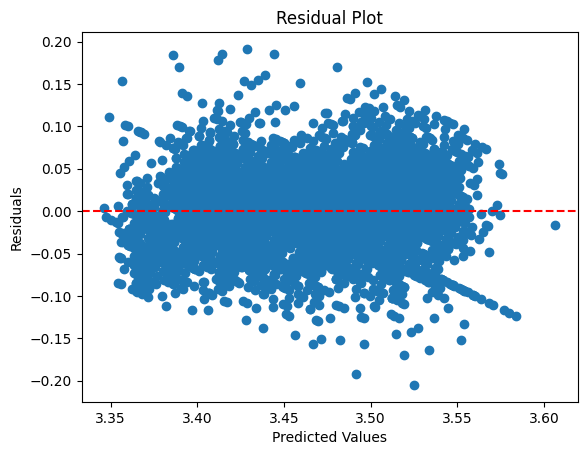

In [69]:
plt.scatter(y_pred_svr, y_test - y_pred_svr)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

#### Compare models

In [70]:
metrics = {
    'Model': ['Linear Regression', 'Polynomial Regression', 'Random Forest', 'GBM', 'SVR'],
    'MSE': [mse, mse_poly, mse_rf, mse_gbm, mse_svr],
    'RMSE': [rmse, rmse_poly, rmse_rf, rmse_gbm, rmse_svr],
    'MAE': [mae, mae_poly, mae_rf, mae_gbm, mae_svr],
    'R^2': [r2, r2_poly, r2_rf, r2_gbm, r2_svr]
}
metrics_df = pd.DataFrame(metrics)
metrics_df

,Model,MSE,RMSE,MAE,R^2
0,Linear Regression,0.002346,0.048435,0.037186,0.563701
1,Polynomial Regression,0.002084,0.045648,0.033659,0.612463
2,Random Forest,0.001602,0.040025,0.029113,0.702063
3,GBM,0.001902,0.043617,0.033085,0.646182
4,SVR,0.002313,0.048096,0.037894,0.569790


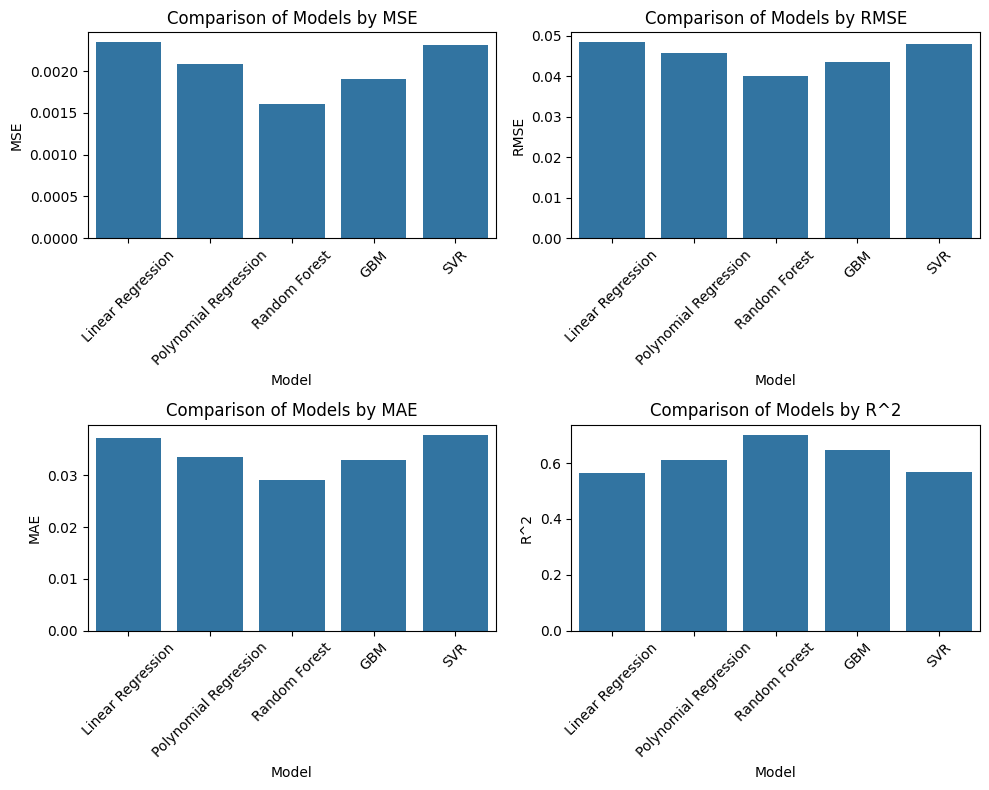

In [74]:

plt.figure(figsize=(10, 8))

for i, metric in enumerate(['MSE', 'RMSE', 'MAE', 'R^2'], 1):
    plt.subplot(2, 2, i)
    sns.barplot(x='Model', y=metric, data=metrics_df)
    plt.title(f'Comparison of Models by {metric}')
    plt.ylabel(metric)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()